In [1]:
import sys
sys.path.append("../")

In [2]:
from scipy import special
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from delay.delay import *
import delay.model as model

In [14]:
p = [0.2, 0.5, 0.7]
model.eigenvector(p)

[0.625, 1.4]

In [4]:
p = [0.9, 0.8, 0.7]
model.calculateStationary(p)

[0.18234442836468884,
 0.2026049204052098,
 0.2532561505065123,
 0.361794500723589]

In [15]:
quotient = [0.625, 1.4]
evector = deque()
evector.appendleft(1)
evector.appendleft(quotient[1] * evector[0])
evector.appendleft(quotient[0] * evector[0])
model.normalize(evector)

[0.26717557251908397, 0.42748091603053434, 0.3053435114503817]

In [16]:
model.normalize([7/8, 7/5, 1])

[0.26717557251908397, 0.42748091603053434, 0.3053435114503817]

In [17]:
[(7/8)/(7/5), 7/5]

[0.625, 1.4]

In [18]:
d = 20
N = 100
tau = 20
epsilon = 0.01

total = 0
someVal = 25
prob = 0
for i in range(someVal-tau, someVal+tau+1):
    gp = model.veryGeneralProb(d, epsilon, i)
    num = model.P(tau, i, gp)
    print('gp * num = %f * %f = %f' % (gp, num, gp*num))
    total += num
    prob += num * gp
prob/total

gp * num = 5.000000 * 0.000000 = 0.000000
gp * num = 6.000000 * 0.000000 = 0.000000
gp * num = 7.000000 * 0.000000 = 0.000000
gp * num = 8.000000 * 0.000000 = 0.000000
gp * num = 9.000000 * 0.000000 = 0.000000
gp * num = 10.000000 * 0.000000 = 0.000000
gp * num = 11.000000 * 0.000000 = 0.000000
gp * num = 12.000000 * 0.000000 = 0.000000
gp * num = 13.000000 * 0.000000 = 0.000000
gp * num = 14.000000 * 0.000000 = 0.000000
gp * num = 15.000000 * 0.000000 = 0.000000
gp * num = 16.000000 * 0.000000 = 0.000000
gp * num = 17.000000 * 0.000000 = 0.000000
gp * num = 18.000000 * 0.000000 = 0.000000
gp * num = 19.000000 * 0.000000 = 0.000000
gp * num = 20.000000 * 0.000000 = 0.000000
gp * num = 21.000000 * 0.000000 = 0.000000
gp * num = 22.000000 * -0.000000 = -0.000000
gp * num = 23.000000 * 0.000000 = 0.000000
gp * num = 24.000000 * 0.000000 = 0.000000
gp * num = 25.000000 * 0.000000 = 0.000000
gp * num = 26.000000 * -0.000000 = -0.000000
gp * num = 27.000000 * 0.000000 = 0.000000
gp * num = 2

/home/kamil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


nan

In [19]:
model.P(N, 14, 0.5)

0.0

In [20]:
x = 24
totalPsi = 0
totalPaths = 2 ** tau
for i in range(-tau, tau):
    totalPsi += model.psi(d, epsilon, x, N, tau, i)
print(totalPsi / totalPaths)

0.13334393501281744


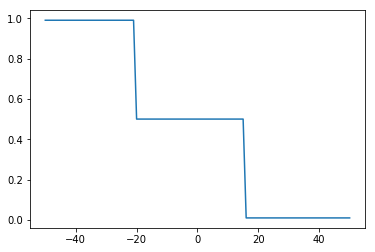

In [21]:
steps = model.domain(100)
vGeneral = np.vectorize(model.generalProb)
gen = vGeneral(20, 0.01, steps, 100, 5, 0)
plt.plot(steps, gen)
plt.show()

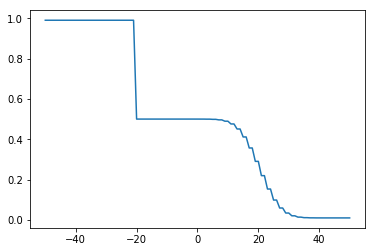

In [136]:
probs = []
N = 100
tau = 30
for x in range(-int(N/2), int(N/2)+1):
    totalPsi = 0
    totalPaths = 2 ** tau
    for i in range(-tau, tau):
        totalPsi += model.psi(d, epsilon, x, N, tau, i)
    probs.append(totalPsi / totalPaths)
    
plt.plot(model.domain(N), probs)
plt.show()

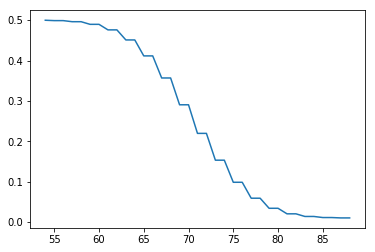

In [143]:
l = 35
z = 50+4
ss = slice(z, z+l)
plt.plot(range(z, z+l), probs[ss])

In [121]:
len(probs)

101

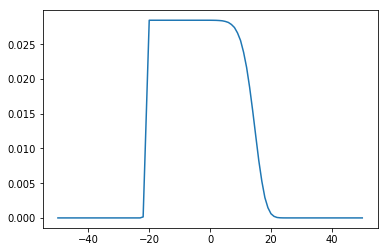

In [122]:
stationary = model.probabilities2Stationary(probs)

model.plot(stationary, len(stationary)-1)

In [126]:
print(ss)

slice(56, 25, None)


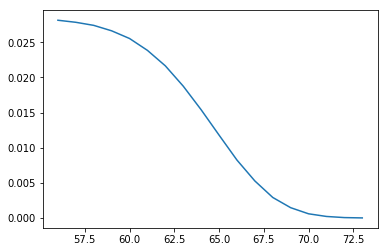

In [130]:
l = 18
ss = slice(56, 56+l)
plt.plot(range(56, 56+l), stationary[ss])

In [106]:
np.mean(stationary)

0.009900990099009901

In [107]:
max(stationary)

0.028457828458923903

In [111]:
for i in range(50, len(stationary)):
    if stationary[i] < 0.028:
        print(i)
        break

57


In [87]:
approximatedProbs = probs

In [88]:
len(approximatedProbs)

101

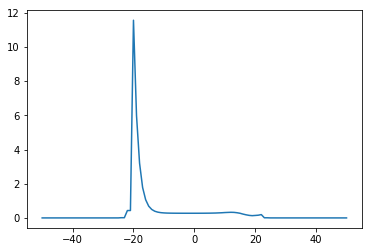

In [60]:
import importlib
importlib.reload(model)
probs = []
N = 100
tau = 30
for x in range(-int(N/2), int(N/2)+1):
    totalPsi = 0
    
    for i in range(-tau, tau):
        totalPsi += model.accurateProbabilities(x, N, tau, i, approximatedProbs)
    probs.append(totalPsi)
    
plt.plot(model.domain(N), probs)
plt.show()

In [76]:
def multiply(pos, tau):
    if tau == 0:
        return 1.0

    accumulator = 0.0
    if pos-1 >= -N/2:
        accumulator += (1-probs[pos])*multiply(pos-1, tau-1)
    if pos+1 <= N/2:
        accumulator += probs[pos] * multiply(pos+1, tau-1)

    return accumulator

multiply(40, 20)

0.988182389768428

In [54]:
model.makeNonDeterministic(probs)
probs

[0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0027307740640759,
 0.13634002841631038,
 0.21106302028708293,
 0.24980827980392314,
 0.26491893465513866,
 0.2701748316393675,
 0.2718955265693412,
 0.27243896365285236,
 0.2726068412910602,
 0.2726582076014325,
 0.2726739433012625,
 0.2726793946896963,
 0.2726816585522723,
 0.2726846234846816,
 0.2726875365049282,
 0.27269585775733207,
 0.2727050024001716,
 0.27273170026587445,
 0.27276120005029175,
 0.272845173967331,
 0.2729379835992534,
 0.273190629089448,
 0.27346623059444847,
 0.2741564733184176,
 0.2749385842688149,
 0.27673268928633193,
 0.278803048551486,
 0.28308941072999017,
 0.2879971317865813,
 0.2969061169040736,
 0.30643549338352044,
 0.3204969119486406,
 0.3327897100388933,
 0.3434008276755457,
 0.3462351830926

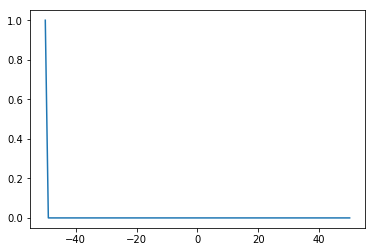

In [55]:
stationary = model.probabilities2Stationary(probs)

model.plot(stationary, len(stationary)-1)

.....................................................................................................

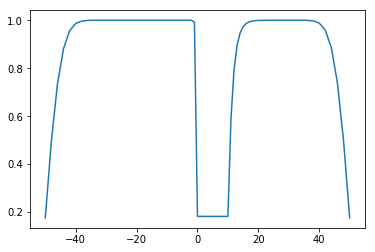

In [113]:
import importlib
importlib.reload(model)
probs = []
N = 100
tau = 20
for x in range(-int(N/2), int(N/2)+1):
    print('.', end='')
    totalPsi = 0
    
    for i in range(-tau, tau):
        totalPsi += model.fineGrainedProbabilities(x, N, tau, i, approximatedProbs)
    probs.append(totalPsi)
    
plt.plot(model.domain(N), probs)
plt.show()

In [114]:
print(probs)

[0.1758320716587181, 0.3356099989615781, 0.4954387861441411, 0.6151113894012649, 0.7349519187805076, 0.8084533731263074, 0.8823320032935303, 0.9190639666915277, 0.9563810025086761, 0.9711828836845444, 0.986618520040913, 0.9913843561867794, 0.9966347915887241, 0.9978466473595096, 0.9993225463485904, 0.9995595656185035, 0.9998986618078292, 0.9999316845373074, 0.9999912254183518, 0.9999937735023706, 1.0000000000000009, 1.0000000000000009, 1.0000000000000004, 1.0000000000000007, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0, 1.0, 0.9999999999999998, 0.9999999999999999, 0.9999999999999998, 0.9999999999999999, 1.0, 0.9999999999999998, 0.9999999999999996, 0.9999999999999994, 0.9999999999999998, 0.9999999999999994, 0.9999999999999999, 0.9999999999999999, 0.9999999999999996, 1.0, 0.9999999999999907, 0.9999999999991307, 0.9999999999139916, 0.9999999914853975, 0.9999991570555529, 0.9999165486177928, 0.9917383135385095, 0.18209307763747135, 0.18209307763747135, 0.1820930776374713

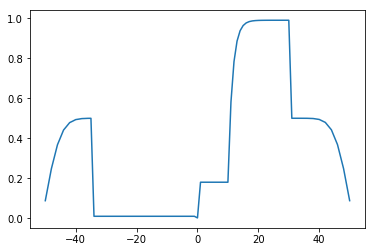

In [119]:
probs = [0.1758320716587181, 0.3356099989615781, 0.4954387861441411, 0.6151113894012649, 0.7349519187805076, 0.8084533731263074, 0.8823320032935303, 0.9190639666915277, 0.9563810025086761, 0.9711828836845444, 0.986618520040913, 0.9913843561867794, 0.9966347915887241, 0.9978466473595096, 0.9993225463485904, 0.9995595656185035, 0.9998986618078292, 0.9999316845373074, 0.9999912254183518, 0.9999937735023706, 1.0000000000000009, 1.0000000000000009, 1.0000000000000004, 1.0000000000000007, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0, 1.0, 0.9999999999999998, 0.9999999999999999, 0.9999999999999998, 0.9999999999999999, 1.0, 0.9999999999999998, 0.9999999999999996, 0.9999999999999994, 0.9999999999999998, 0.9999999999999994, 0.9999999999999999, 0.9999999999999999, 0.9999999999999996, 1.0, 0.9999999999999907, 0.9999999999991307, 0.9999999999139916, 0.9999999914853975, 0.9999991570555529, 0.9999165486177928, 0.9917383135385095, 0.18209307763747135, 0.18209307763747135, 0.18209307763747135, 0.18209307763747135, 0.18209307763747135, 0.18209307763747135, 0.18209307763747135, 0.1820930889480847, 0.18209326426258843, 0.18209497027970525, 0.18210700851460446, 0.5869227315730325, 0.7913751169560772, 0.8946338974525642, 0.946784796693214, 0.9731236346935428, 0.9864260781280519, 0.9931444839030563, 0.9965376181328569, 0.9982513222893213, 0.9991168294390516, 0.999553954262147, 0.9997747243748218, 0.9998862244317283, 0.9999425375917821, 0.9999709785817079, 0.9999853427180344, 0.999992597332238, 0.9999962612782092, 0.9999981117535341, 0.9999990463300708, 0.999999046357863, 0.9999980927157242, 0.9999790198451569, 0.999959946974554, 0.9997787544080571, 0.9995975618412231, 0.9985104044391213, 0.9974232470349944, 0.9928028184060143, 0.9881823897684278, 0.9733969827114805, 0.9586115756269932, 0.9216479555187295, 0.8846843353416158, 0.8107568555573472, 0.7368293756353783, 0.6166967601362796, 0.49656413783474196, 0.336386453640278, 0.17620744609035355]
for i in model.domain(N):
    probs[i] = probs[i] * model.generalProb(20, 0.01, i, 100, 5, 0)
plt.plot(model.domain(N), probs)
plt.show()

In [103]:
model.fineGrainedProbabilities(30, 100, 20, 0, approximatedProbs)

0.3360468700838099

In [101]:
def multiply(pos, tau, destination):
        def canDecrement(pos, tau, destination):
            if pos >= destination:
                return pos-1 >= -N/2
            return destination-(pos-1) <= tau-1 and pos-1 >= -N/2

        def canIncrement(pos, tau, destination):
            if pos <= destination:
                return pos+1 <= N/2
            return pos+1-destination <= tau-1 and pos+1 <= N/2

        if tau == 0:
            return 1.0
        
        accumulator = 0.0
        if canDecrement(pos, tau, destination):
            accumulator += (1-approximatedProbs[pos]) * \
                multiply(pos-1, tau-1, destination)
        if canIncrement(pos, tau, destination):
            accumulator += approximatedProbs[pos] * \
                multiply(pos+1, tau-1, destination)

        return accumulator
    
multiply(20, 2, 20)

0.01980000180713814

In [100]:
print(approximatedProbs)

[0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999990779907, 0.9899999853875489, 0.9899997868761421, 0.9899979341030122, 0.989985427884385, 0.4999999995343387, 0.4999999995343387, 0.4999999995343387, 0.4999999995343387, 0.4999999995343387, 0.4999999995343387, 0.4999999995343387, 0.4999999995343387, 0.4999999995343387, 0.4999999995343387, 0.4999999995343387, 0.4999999995343387, 0.4999999995343387, 0.4999999995343387, 0.4999999995343387, 0.4999999995343387, 0.4999999995343387, 0.4999999858438969, 0.4999997873324901, 0.4999979345593602, 